In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
sys.path.append('/Users/i.nuriev/repository/mmm-tools/mmm_tools')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from media_transformation import *
import warnings
warnings.filterwarnings('ignore')
from statsmodels.regression.recursive_ls import RecursiveLS
import dowhy
from copy import deepcopy
from IPython.display import Markdown, SVG, display
from dowhy import CausalModel
pd.options.display.float_format = '{:.3f}'.format

## Business metrics

In [3]:
df_business_metrics = pd.read_excel('data.xlsx',sheet_name = 'business_metric')
df_business_metrics.fillna(0,inplace=True)
business_features = df_business_metrics.columns[1:]

In [4]:
df_business_metrics.index = df_business_metrics.date
df_business_metrics = df_business_metrics.groupby(pd.Grouper(freq='W-MON')).agg({'installs_organic_new':'sum',
                                                                                                    'installs_organic_return':'sum',
                                                                                                    'installs_paid_new':'sum',
                                                                                                    'installs_paid_return':'sum',
                                                                                                    'installs_total':'sum',
                                                                                                    'subscription_activation':'sum',
                                                                                                    'subscription_recurrent':'sum',
                                                                                                    'dau_saa':lambda x: x.mean(),
                                                                                                    'dau_superapp':lambda x: x.mean(),
                                                                                                    'dau_net':lambda x: x.mean(),
                                                                                                    'dau_net_new': lambda x: x.mean()
                                                                                                    })
df_business_metrics.reset_index(inplace=True)
df_business_metrics['subscription_total'] = df_business_metrics[['subscription_activation','subscription_recurrent']].sum(axis=1)

In [5]:
subs = pd.read_excel('active_subs_from_2022.xlsx')
subs.index = subs.date
subs_col = subs.columns[1:]
subs = subs.groupby(pd.Grouper(freq='W-MON'))[subs_col].sum()
subs.reset_index(inplace=True)
subs['subscribers_active_total'] = subs[['subscribers_active_trial','subscribers_active_notrial']].sum(axis=1)

In [6]:
df_business_metrics = df_business_metrics.merge(subs, how = 'left', on ='date')

# Sensetivity test

Рассматриваем парные регрессии:
$$y_t = b_0 + b_1\cdot x_t$$

## NET

In [7]:
bht_net_w_14_44 = ['aa_prompted_roll_kpi_percent_14_44_net','ba_prompted_roll_kpi_percent_14_44_net','ba_spontaneous_roll_kpi_percent_14_44_net','ba_top_of_mind_roll_kpi_percent_14_44_net','consid_roll_kpi_percent_14_44_net','brand_preference_roll_kpi_percent_14_44_net']
bht_net_w_14_60 = ['aa_prompted_roll_kpi_percent_14_60_net','ba_prompted_roll_kpi_percent_14_60_net','ba_spontaneous_roll_kpi_percent_14_60_net','ba_top_of_mind_roll_kpi_percent_14_60_net','consid_roll_kpi_percent_14_60_net','brand_preference_roll_kpi_percent_14_60_net']

bht_net_w = pd.read_excel('data.xlsx',sheet_name = 'bht_net_w')[['date_start'] + bht_net_w_14_44 + bht_net_w_14_60]
bht_net_w.rename(columns = {'date_start':'date'},inplace=True)

net = bht_net_w.merge(df_business_metrics,how='inner', on ='date')

### DAU

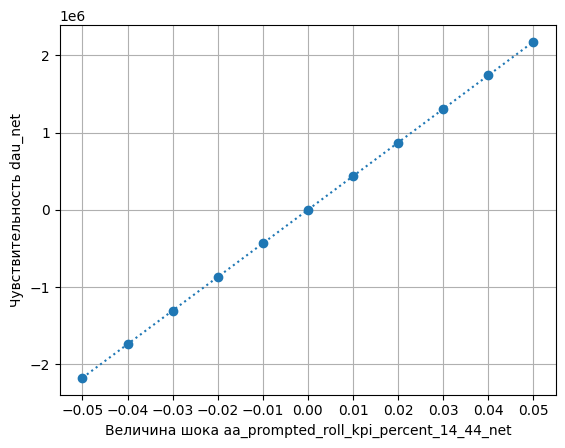

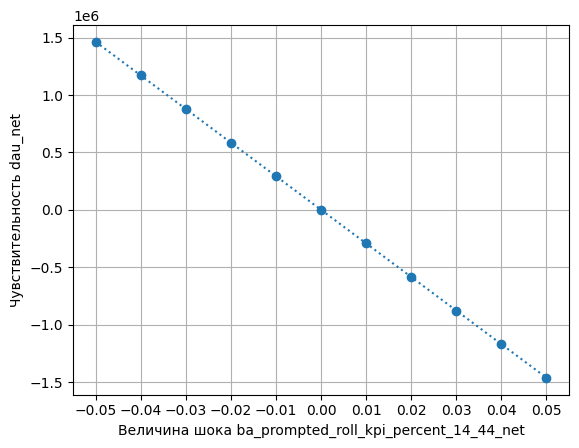

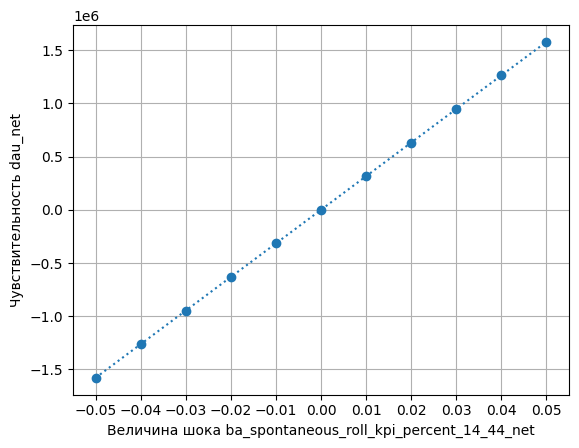

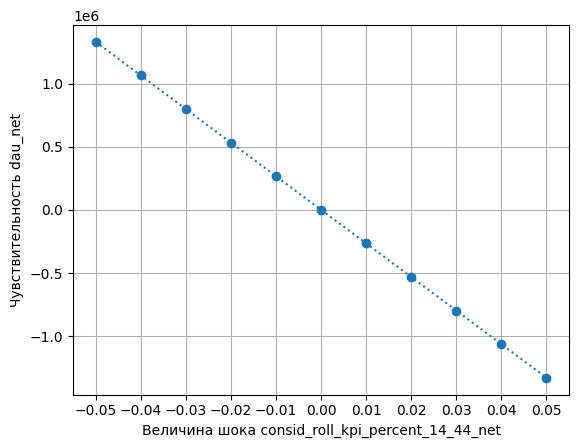

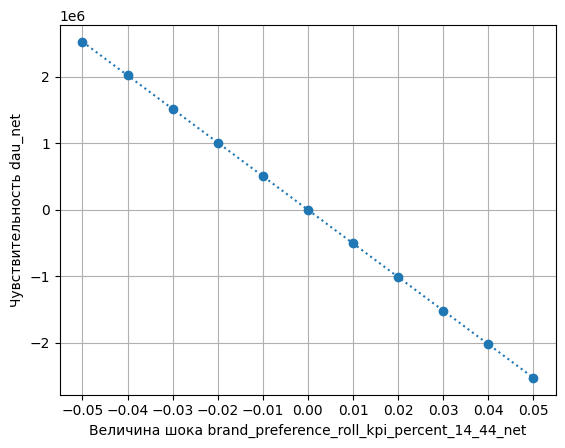

,-0.050,-0.040,-0.030,-0.020,-0.010,0.000,0.010,0.020,0.030,0.040,0.050
aa_prompted_roll_kpi_percent_14_44_net,-2176694.108,-1741355.286,-1306016.465,-870677.643,-435338.822,0.000,435338.822,870677.643,1306016.465,1741355.286,2176694.108
ba_prompted_roll_kpi_percent_14_44_net,1463052.421,1170441.937,877831.453,585220.969,292610.484,0.000,-292610.484,-585220.969,-877831.453,-1170441.937,-1463052.421
ba_spontaneous_roll_kpi_percent_14_44_net,-1578388.919,-1262711.136,-947033.352,-631355.568,-315677.784,0.000,315677.784,631355.568,947033.352,1262711.136,1578388.919
consid_roll_kpi_percent_14_44_net,1331911.050,1065528.840,799146.630,532764.420,266382.210,0.000,-266382.210,-532764.420,-799146.630,-1065528.840,-1331911.050
brand_preference_roll_kpi_percent_14_44_net,2526741.502,2021393.202,1516044.901,1010696.601,505348.300,0.000,-505348.300,-1010696.601,-1516044.901,-2021393.202,-2526741.502


,aa_prompted_roll_kpi_percent_14_44_net,ba_prompted_roll_kpi_percent_14_44_net,ba_spontaneous_roll_kpi_percent_14_44_net,consid_roll_kpi_percent_14_44_net,brand_preference_roll_kpi_percent_14_44_net
-0.050,-2176694.108,1463052.421,-1578388.919,1331911.050,2526741.502
-0.040,-1741355.286,1170441.937,-1262711.136,1065528.840,2021393.202
-0.030,-1306016.465,877831.453,-947033.352,799146.630,1516044.901
-0.020,-870677.643,585220.969,-631355.568,532764.420,1010696.601
-0.010,-435338.822,292610.484,-315677.784,266382.210,505348.300
0.000,0.000,0.000,0.000,0.000,0.000
0.010,435338.822,-292610.484,315677.784,-266382.210,-505348.300
0.020,870677.643,-585220.969,631355.568,-532764.420,-1010696.601
0.030,1306016.465,-877831.453,947033.352,-799146.630,-1516044.901
0.040,1741355.286,-1170441.937,1262711.136,-1065528.840,-2021393.202


In [8]:
calc_sens(net,kpi = 'dau_net', 
          features_to_shock = ['aa_prompted_roll_kpi_percent_14_44_net', 'ba_prompted_roll_kpi_percent_14_44_net',
                              'ba_spontaneous_roll_kpi_percent_14_44_net','consid_roll_kpi_percent_14_44_net',
                              'brand_preference_roll_kpi_percent_14_44_net'] )

### Subscriptions Active Total

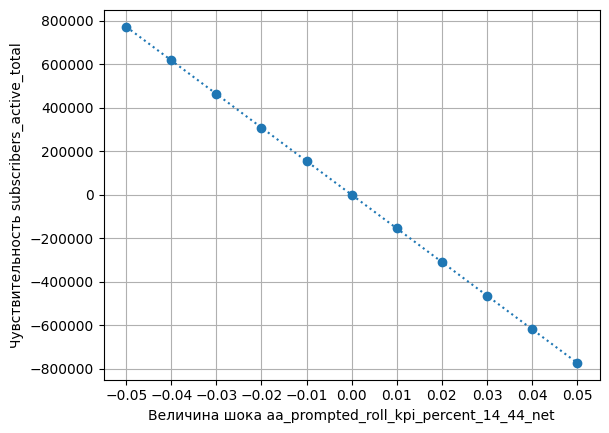

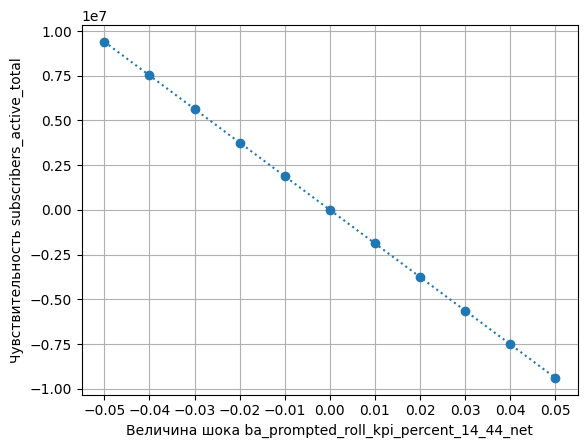

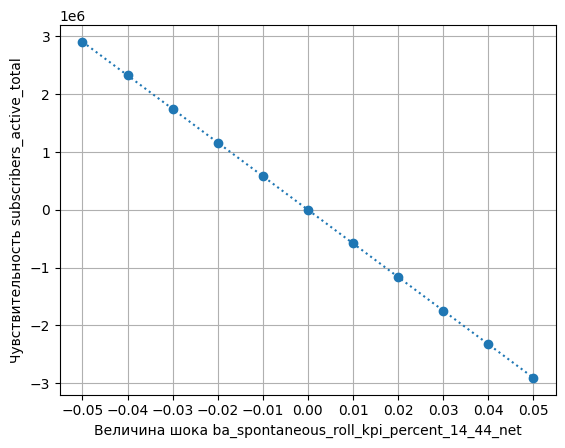

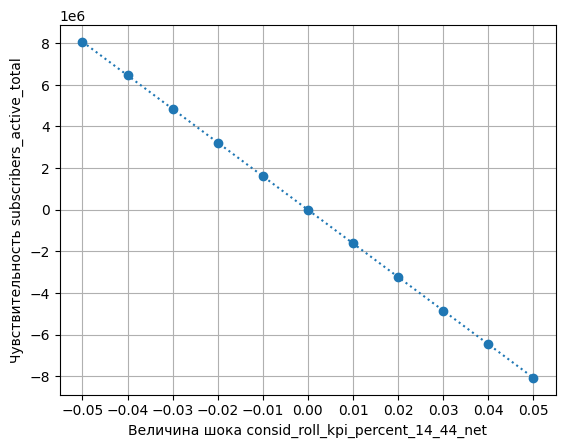

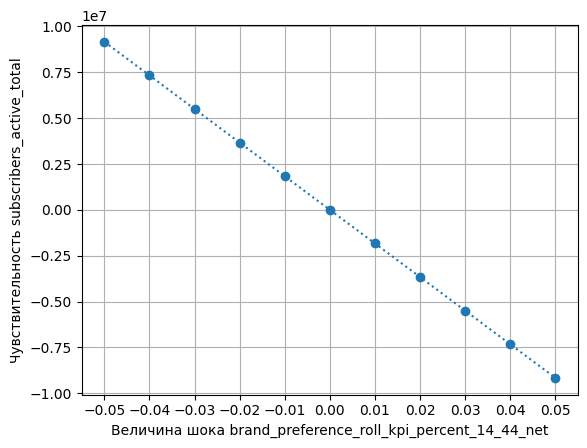

,-0.050,-0.040,-0.030,-0.020,-0.010,0.000,0.010,0.020,0.030,0.040,0.050
aa_prompted_roll_kpi_percent_14_44_net,772946.652,618357.322,463767.991,309178.661,154589.330,0.000,-154589.330,-309178.661,-463767.991,-618357.322,-772946.652
ba_prompted_roll_kpi_percent_14_44_net,9389227.468,7511381.974,5633536.481,3755690.987,1877845.494,0.000,-1877845.494,-3755690.987,-5633536.481,-7511381.974,-9389227.468
ba_spontaneous_roll_kpi_percent_14_44_net,2906674.648,2325339.719,1744004.789,1162669.859,581334.930,0.000,-581334.930,-1162669.859,-1744004.789,-2325339.719,-2906674.648
consid_roll_kpi_percent_14_44_net,8066317.871,6453054.297,4839790.722,3226527.148,1613263.574,0.000,-1613263.574,-3226527.148,-4839790.722,-6453054.297,-8066317.871
brand_preference_roll_kpi_percent_14_44_net,9152857.137,7322285.710,5491714.282,3661142.855,1830571.427,0.000,-1830571.427,-3661142.855,-5491714.282,-7322285.710,-9152857.137


,aa_prompted_roll_kpi_percent_14_44_net,ba_prompted_roll_kpi_percent_14_44_net,ba_spontaneous_roll_kpi_percent_14_44_net,consid_roll_kpi_percent_14_44_net,brand_preference_roll_kpi_percent_14_44_net
-0.050,772946.652,9389227.468,2906674.648,8066317.871,9152857.137
-0.040,618357.322,7511381.974,2325339.719,6453054.297,7322285.710
-0.030,463767.991,5633536.481,1744004.789,4839790.722,5491714.282
-0.020,309178.661,3755690.987,1162669.859,3226527.148,3661142.855
-0.010,154589.330,1877845.494,581334.930,1613263.574,1830571.427
0.000,0.000,0.000,0.000,0.000,0.000
0.010,-154589.330,-1877845.494,-581334.930,-1613263.574,-1830571.427
0.020,-309178.661,-3755690.987,-1162669.859,-3226527.148,-3661142.855
0.030,-463767.991,-5633536.481,-1744004.789,-4839790.722,-5491714.282
0.040,-618357.322,-7511381.974,-2325339.719,-6453054.297,-7322285.710


In [9]:
calc_sens(net,kpi = 'subscribers_active_total', 
          features_to_shock = ['aa_prompted_roll_kpi_percent_14_44_net', 'ba_prompted_roll_kpi_percent_14_44_net',
                              'ba_spontaneous_roll_kpi_percent_14_44_net','consid_roll_kpi_percent_14_44_net',
                              'brand_preference_roll_kpi_percent_14_44_net'] )

### Installs Total

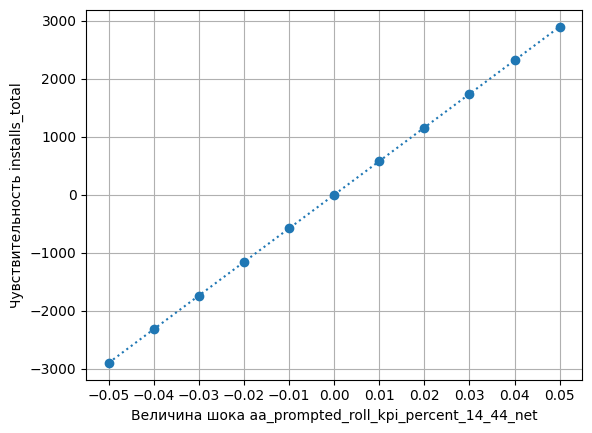

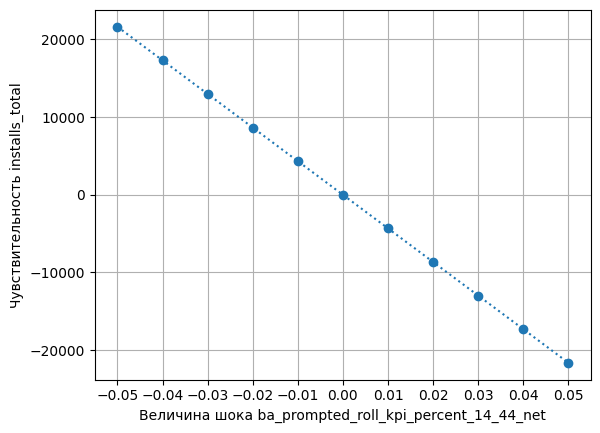

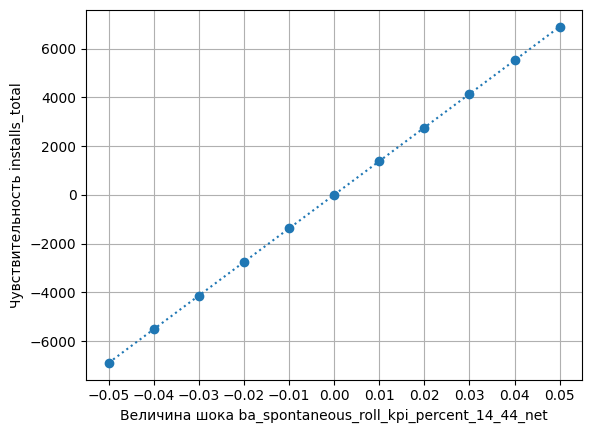

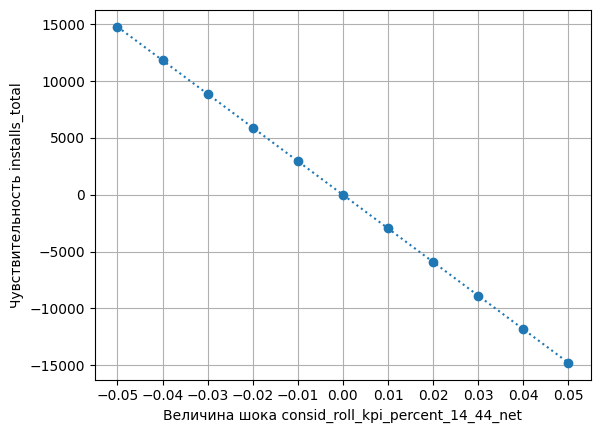

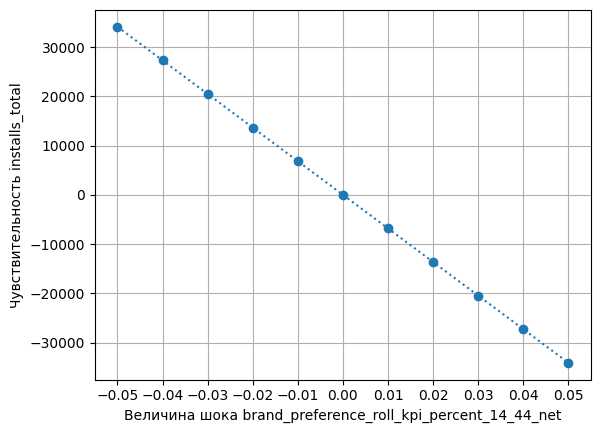

,-0.050,-0.040,-0.030,-0.020,-0.010,0.000,0.010,0.020,0.030,0.040,0.050
aa_prompted_roll_kpi_percent_14_44_net,-2899.486,-2319.589,-1739.691,-1159.794,-579.897,0.000,579.897,1159.794,1739.691,2319.589,2899.486
ba_prompted_roll_kpi_percent_14_44_net,21621.372,17297.098,12972.823,8648.549,4324.274,0.000,-4324.274,-8648.549,-12972.823,-17297.098,-21621.372
ba_spontaneous_roll_kpi_percent_14_44_net,-6893.431,-5514.745,-4136.059,-2757.373,-1378.686,0.000,1378.686,2757.373,4136.059,5514.745,6893.431
consid_roll_kpi_percent_14_44_net,14784.600,11827.680,8870.760,5913.840,2956.920,0.000,-2956.920,-5913.840,-8870.760,-11827.680,-14784.600
brand_preference_roll_kpi_percent_14_44_net,34108.699,27286.959,20465.219,13643.480,6821.740,0.000,-6821.740,-13643.480,-20465.219,-27286.959,-34108.699


,aa_prompted_roll_kpi_percent_14_44_net,ba_prompted_roll_kpi_percent_14_44_net,ba_spontaneous_roll_kpi_percent_14_44_net,consid_roll_kpi_percent_14_44_net,brand_preference_roll_kpi_percent_14_44_net
-0.050,-2899.486,21621.372,-6893.431,14784.600,34108.699
-0.040,-2319.589,17297.098,-5514.745,11827.680,27286.959
-0.030,-1739.691,12972.823,-4136.059,8870.760,20465.219
-0.020,-1159.794,8648.549,-2757.373,5913.840,13643.480
-0.010,-579.897,4324.274,-1378.686,2956.920,6821.740
0.000,0.000,0.000,0.000,0.000,0.000
0.010,579.897,-4324.274,1378.686,-2956.920,-6821.740
0.020,1159.794,-8648.549,2757.373,-5913.840,-13643.480
0.030,1739.691,-12972.823,4136.059,-8870.760,-20465.219
0.040,2319.589,-17297.098,5514.745,-11827.680,-27286.959


In [10]:
calc_sens(net,kpi = 'installs_total', 
          features_to_shock = ['aa_prompted_roll_kpi_percent_14_44_net', 'ba_prompted_roll_kpi_percent_14_44_net',
                              'ba_spontaneous_roll_kpi_percent_14_44_net','consid_roll_kpi_percent_14_44_net',
                              'brand_preference_roll_kpi_percent_14_44_net'] )

## SAA

In [11]:
bht_saa_w_14_44 = ['aa_prompted_roll_kpi_percent_14_44_saa','ba_prompted_roll_kpi_percent_14_44_saa','ba_spontaneous_roll_kpi_percent_14_44_saa','ba_top_of_mind_roll_kpi_percent_14_44_saa','consid_roll_kpi_percent_14_44_saa','brand_preference_roll_kpi_percent_14_44_saa']
bht_saa_w_14_60 = ['aa_prompted_roll_kpi_percent_14_60_saa','ba_prompted_roll_kpi_percent_14_60_saa','ba_spontaneous_roll_kpi_percent_14_60_saa','ba_top_of_mind_roll_kpi_percent_14_60_saa','consid_roll_kpi_percent_14_60_saa','brand_preference_roll_kpi_percent_14_60_saa']

bht_saa_w = pd.read_excel('data.xlsx',sheet_name = 'bht_saa_w')[['date_start'] + bht_saa_w_14_44 + bht_saa_w_14_60]
bht_saa_w.rename(columns = {'date_start':'date'},inplace=True)

saa = bht_saa_w.merge(df_business_metrics,how='inner', on ='date')

### DAU

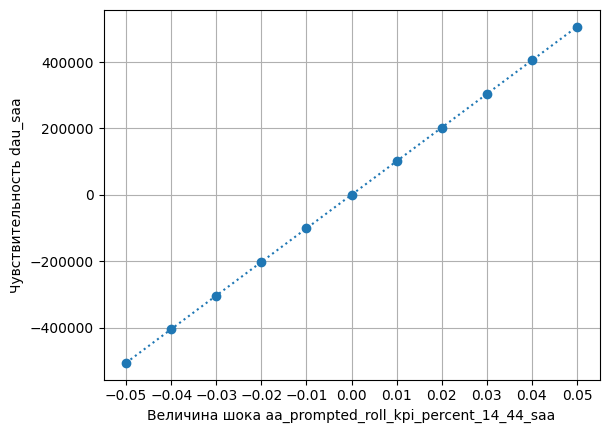

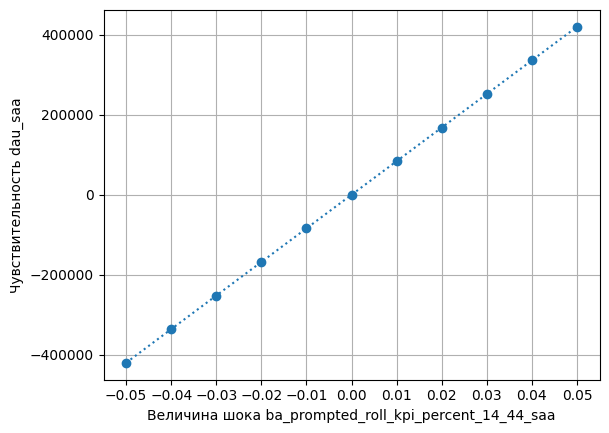

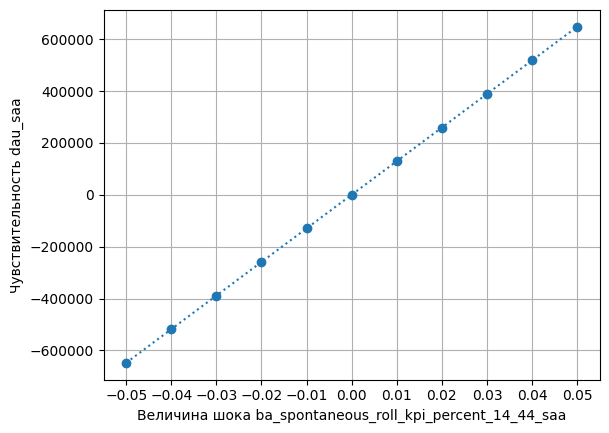

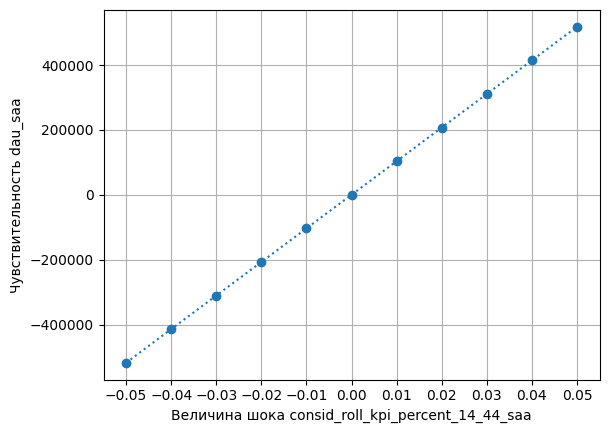

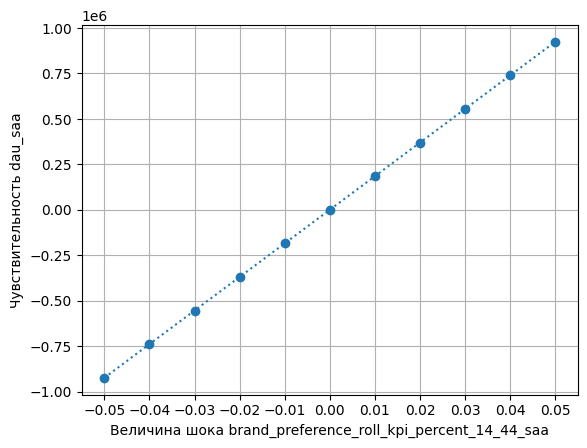

,-0.050,-0.040,-0.030,-0.020,-0.010,0.000,0.010,0.020,0.030,0.040,0.050
aa_prompted_roll_kpi_percent_14_44_saa,-506280.006,-405024.005,-303768.003,-202512.002,-101256.001,0.000,101256.001,202512.002,303768.003,405024.005,506280.006
ba_prompted_roll_kpi_percent_14_44_saa,-420194.392,-336155.513,-252116.635,-168077.757,-84038.878,0.000,84038.878,168077.757,252116.635,336155.513,420194.392
ba_spontaneous_roll_kpi_percent_14_44_saa,-647886.549,-518309.239,-388731.929,-259154.620,-129577.310,0.000,129577.310,259154.620,388731.929,518309.239,647886.549
consid_roll_kpi_percent_14_44_saa,-517957.127,-414365.702,-310774.276,-207182.851,-103591.425,0.000,103591.425,207182.851,310774.276,414365.702,517957.127
brand_preference_roll_kpi_percent_14_44_saa,-923624.275,-738899.420,-554174.565,-369449.710,-184724.855,0.000,184724.855,369449.710,554174.565,738899.420,923624.275


,aa_prompted_roll_kpi_percent_14_44_saa,ba_prompted_roll_kpi_percent_14_44_saa,ba_spontaneous_roll_kpi_percent_14_44_saa,consid_roll_kpi_percent_14_44_saa,brand_preference_roll_kpi_percent_14_44_saa
-0.050,-506280.006,-420194.392,-647886.549,-517957.127,-923624.275
-0.040,-405024.005,-336155.513,-518309.239,-414365.702,-738899.420
-0.030,-303768.003,-252116.635,-388731.929,-310774.276,-554174.565
-0.020,-202512.002,-168077.757,-259154.620,-207182.851,-369449.710
-0.010,-101256.001,-84038.878,-129577.310,-103591.425,-184724.855
0.000,0.000,0.000,0.000,0.000,0.000
0.010,101256.001,84038.878,129577.310,103591.425,184724.855
0.020,202512.002,168077.757,259154.620,207182.851,369449.710
0.030,303768.003,252116.635,388731.929,310774.276,554174.565
0.040,405024.005,336155.513,518309.239,414365.702,738899.420


In [12]:
calc_sens(saa,kpi = 'dau_saa', 
          features_to_shock = ['aa_prompted_roll_kpi_percent_14_44_saa', 'ba_prompted_roll_kpi_percent_14_44_saa',
                              'ba_spontaneous_roll_kpi_percent_14_44_saa','consid_roll_kpi_percent_14_44_saa',
                              'brand_preference_roll_kpi_percent_14_44_saa'] )

### Subscribers Active Total

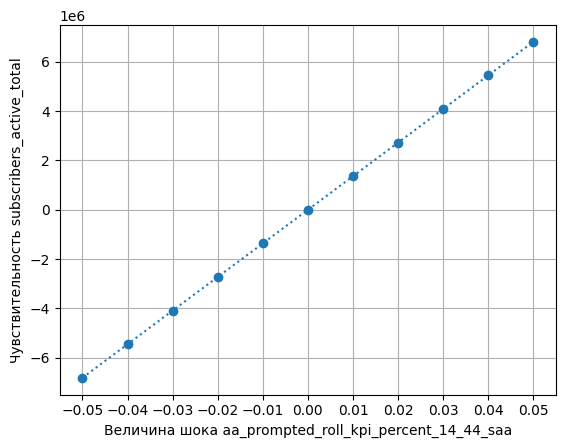

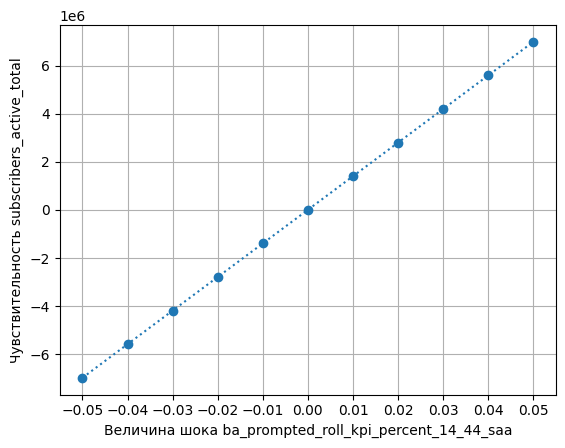

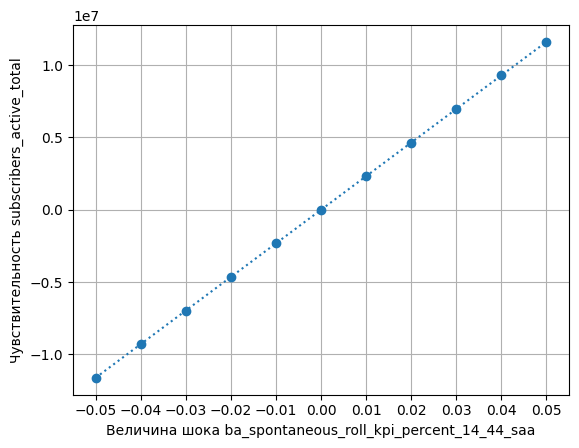

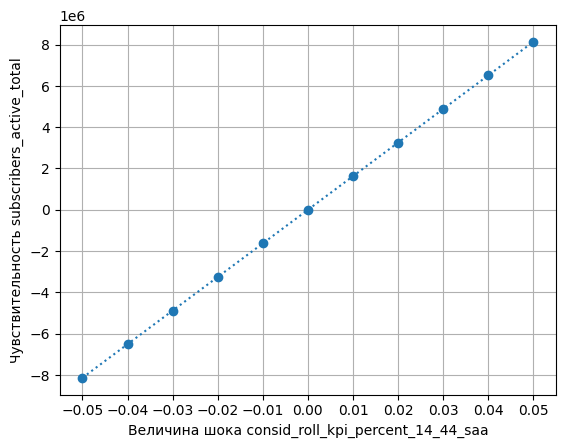

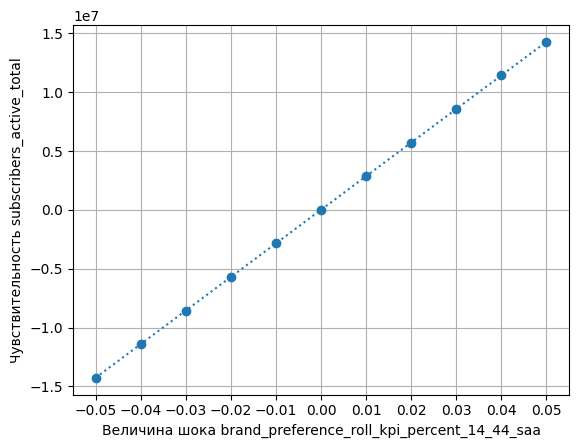

,-0.050,-0.040,-0.030,-0.020,-0.010,0.000,0.010,0.020,0.030,0.040,0.050
aa_prompted_roll_kpi_percent_14_44_saa,-6809597.722,-5447678.178,-4085758.633,-2723839.089,-1361919.544,0.000,1361919.544,2723839.089,4085758.633,5447678.178,6809597.722
ba_prompted_roll_kpi_percent_14_44_saa,-6991971.669,-5593577.335,-4195183.001,-2796788.668,-1398394.334,0.000,1398394.334,2796788.668,4195183.001,5593577.335,6991971.669
ba_spontaneous_roll_kpi_percent_14_44_saa,-11612355.159,-9289884.127,-6967413.096,-4644942.064,-2322471.032,0.000,2322471.032,4644942.064,6967413.096,9289884.127,11612355.159
consid_roll_kpi_percent_14_44_saa,-8131651.197,-6505320.957,-4878990.718,-3252660.479,-1626330.239,0.000,1626330.239,3252660.479,4878990.718,6505320.957,8131651.197
brand_preference_roll_kpi_percent_14_44_saa,-14261668.654,-11409334.923,-8557001.192,-5704667.461,-2852333.731,0.000,2852333.731,5704667.461,8557001.192,11409334.923,14261668.654


,aa_prompted_roll_kpi_percent_14_44_saa,ba_prompted_roll_kpi_percent_14_44_saa,ba_spontaneous_roll_kpi_percent_14_44_saa,consid_roll_kpi_percent_14_44_saa,brand_preference_roll_kpi_percent_14_44_saa
-0.050,-6809597.722,-6991971.669,-11612355.159,-8131651.197,-14261668.654
-0.040,-5447678.178,-5593577.335,-9289884.127,-6505320.957,-11409334.923
-0.030,-4085758.633,-4195183.001,-6967413.096,-4878990.718,-8557001.192
-0.020,-2723839.089,-2796788.668,-4644942.064,-3252660.479,-5704667.461
-0.010,-1361919.544,-1398394.334,-2322471.032,-1626330.239,-2852333.731
0.000,0.000,0.000,0.000,0.000,0.000
0.010,1361919.544,1398394.334,2322471.032,1626330.239,2852333.731
0.020,2723839.089,2796788.668,4644942.064,3252660.479,5704667.461
0.030,4085758.633,4195183.001,6967413.096,4878990.718,8557001.192
0.040,5447678.178,5593577.335,9289884.127,6505320.957,11409334.923


In [13]:
calc_sens(saa,kpi = 'subscribers_active_total', 
          features_to_shock = ['aa_prompted_roll_kpi_percent_14_44_saa', 'ba_prompted_roll_kpi_percent_14_44_saa',
                              'ba_spontaneous_roll_kpi_percent_14_44_saa','consid_roll_kpi_percent_14_44_saa',
                              'brand_preference_roll_kpi_percent_14_44_saa'] )

# Тест причинности Грейнджера

Идея теста Грейнджера заключается в том, что если прошлые значения одной переменной помогают предсказать текущие значения другой переменной, то можно сказать, что первая переменная "причинно-следственно" влияет на вторую.

- $H_0$ - переменная X не "грейнджер-причинно" влияет на переменную Y.
- $H_A$ - переменная X "грейнджер-причинно" влияет на переменную Y.

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_result_y = grangercausalitytests(net[['ba_prompted_roll_kpi_percent_14_44_net', 'aa_prompted_roll_kpi_percent_14_44_net']], maxlag=[ 3 ])
granger_result_y[3][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6608  , p=0.0158  , df_denom=79, df_num=3
ssr based chi2 test:   chi2=11.9557 , p=0.0075  , df=3
likelihood ratio test: chi2=11.1944 , p=0.0107  , df=3
parameter F test:         F=3.6608  , p=0.0158  , df_denom=79, df_num=3


In [15]:
granger_result_x = grangercausalitytests(net[['aa_prompted_roll_kpi_percent_14_44_net', 'ba_prompted_roll_kpi_percent_14_44_net']], maxlag=[ 3 ])
granger_result_x[3][0]['params_ftest'][1]



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2131  , p=0.3105  , df_denom=79, df_num=3
ssr based chi2 test:   chi2=3.9617  , p=0.2656  , df=3
likelihood ratio test: chi2=3.8731  , p=0.2755  , df=3
parameter F test:         F=1.2131  , p=0.3105  , df_denom=79, df_num=3


# VARX

In [16]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [17]:
endog_train = net[['dau_saa','subscribers_active_total']]
exog_train = net[['aa_prompted_roll_kpi_percent_14_44_net',
       'ba_prompted_roll_kpi_percent_14_44_net',
       'ba_spontaneous_roll_kpi_percent_14_44_net',
       'ba_top_of_mind_roll_kpi_percent_14_44_net',
       'consid_roll_kpi_percent_14_44_net',
       ]]

endog_test = net[['dau_saa','subscribers_active_total']]
exog_test = net[['aa_prompted_roll_kpi_percent_14_44_net',
       'ba_prompted_roll_kpi_percent_14_44_net',
       'ba_spontaneous_roll_kpi_percent_14_44_net',
       'ba_top_of_mind_roll_kpi_percent_14_44_net',
       'consid_roll_kpi_percent_14_44_net',
       'brand_preference_roll_kpi_percent_14_44_net']]

In [18]:
model = VAR(endog=endog_train, exog=exog_test).fit()
print(model.summary())
predict = model.forecast(model.endog,steps=len(exog_test),exog_future=exog_test)
y_pred = predict[:,0] # выбираем золото

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Jul, 2024
Time:                     14:38:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    49.2485
Nobs:                     88.0000    HQIC:                   48.9459
Log likelihood:          -2376.37    FPE:                1.47542e+21
AIC:                      48.7418    Det(Omega_mle):     1.21433e+21
--------------------------------------------------------------------
Results for equation dau_saa
                                                 coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------
const                                         -220462.978760    571377.544598           -0.386           0.700
aa_prompted_roll_kpi_percent_14_44_net         10

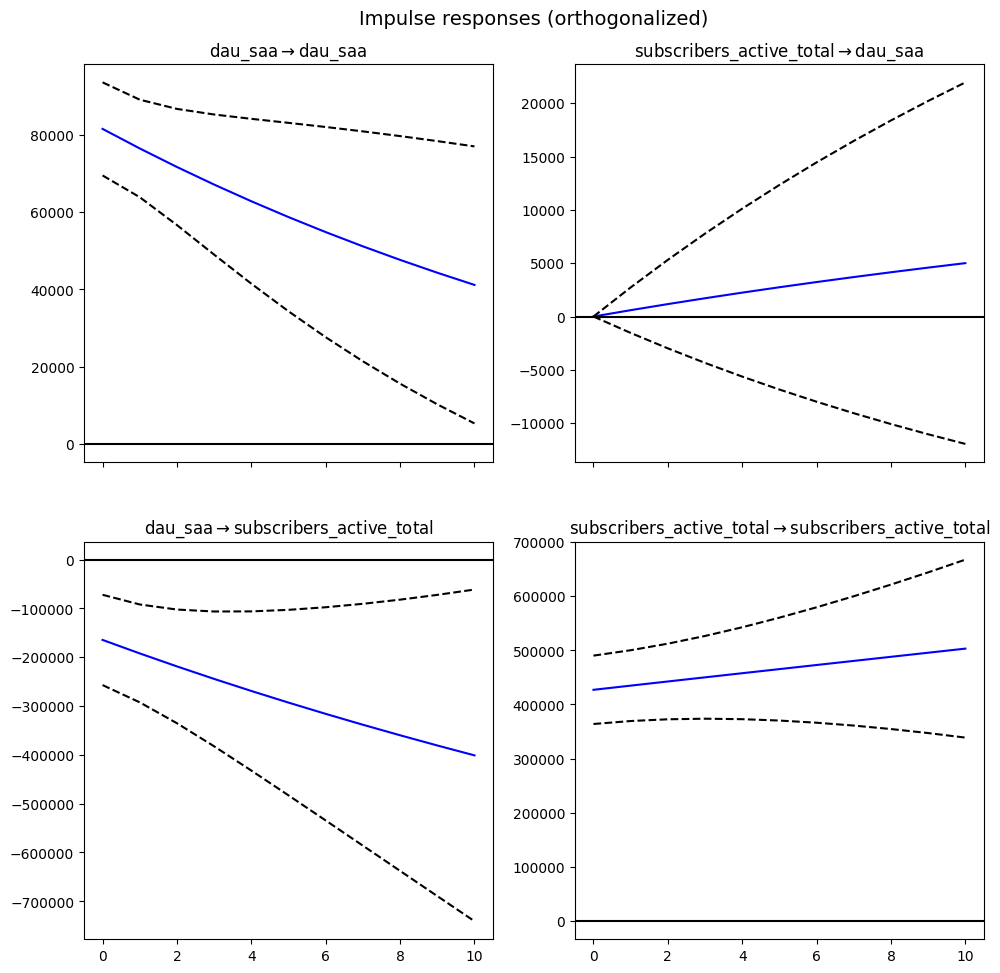

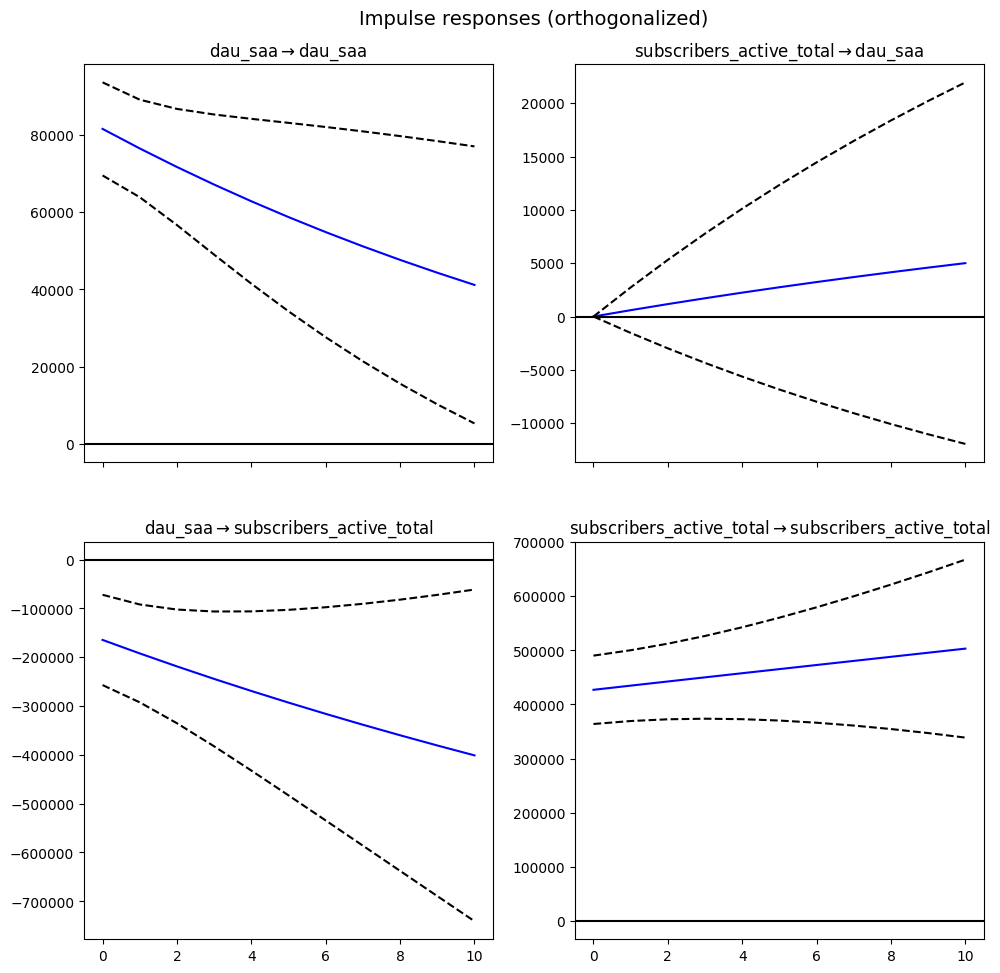

In [19]:
irf = model.irf(10)
irf.plot(orth=True)

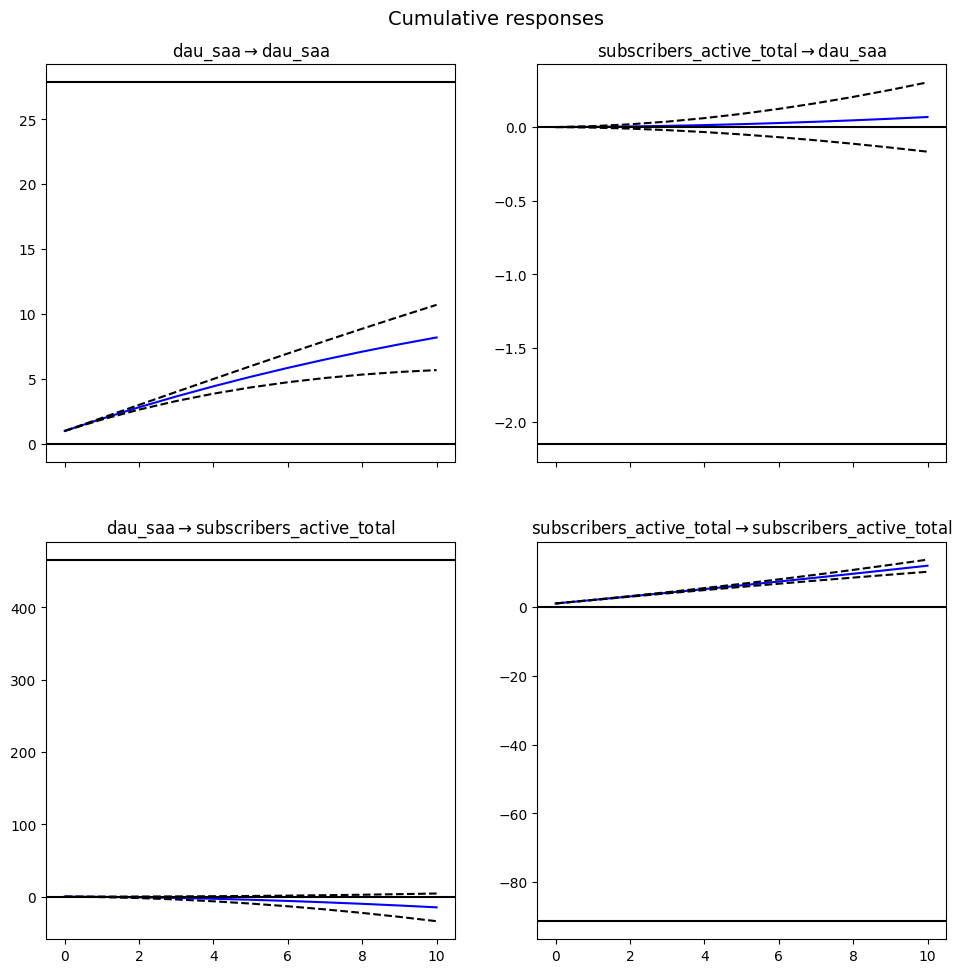

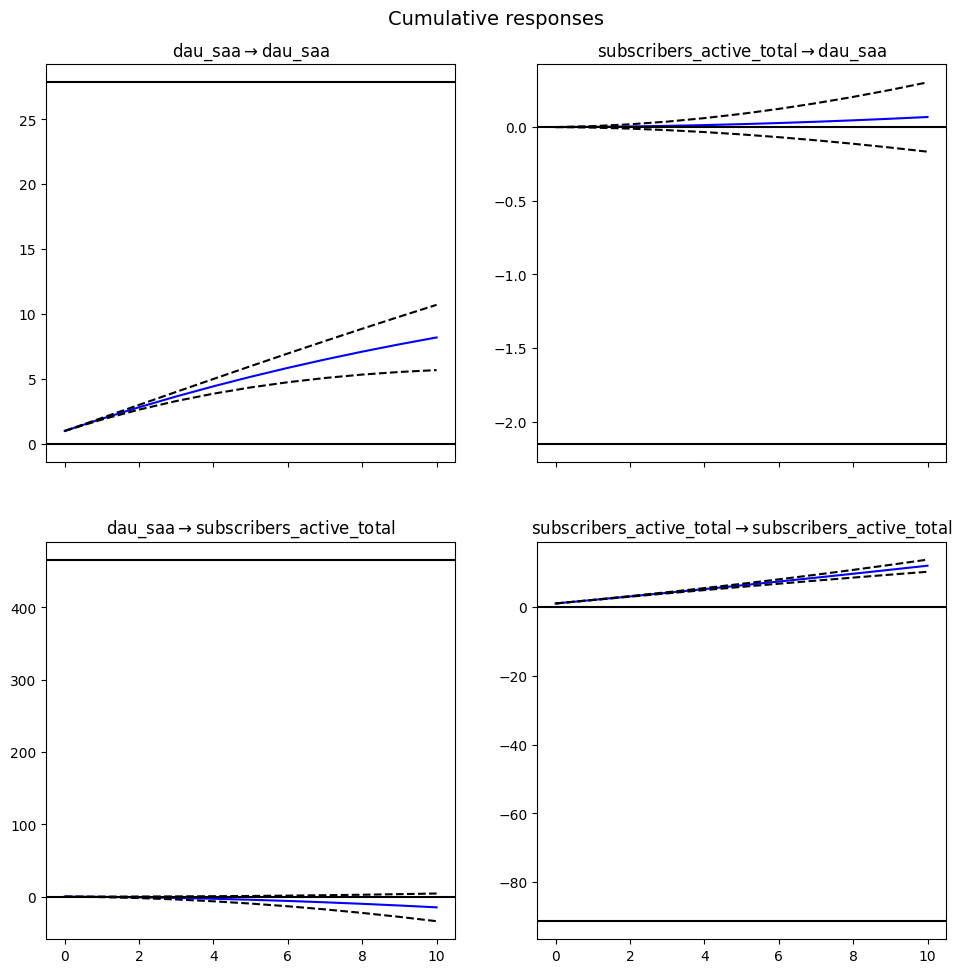

In [20]:
irf.plot_cum_effects()

In [21]:
# Impulse Response Function (IRF)
def plot_irf(model, npersid=20):
    irf = model.irf(npersid)
    irf.plot(figsize=(12, 6))
    plt.title('Impulse Response Function')
    plt.xlabel('Periods')
    plt.ylabel('Response')
    plt.show()

# EconML

**Doubly Robust Learner**

- T (Treatment) - переменная, влияние на Y которой хотим оценить
- W (Confounder) - переменные, влияющие как на Y, так и на T
- X - переменные, влияющие только на Y

1) Y = $\phi(X,W)$
2) T = f(W) 

In [22]:
Y = saa[['dau_saa']]
T = saa[['ba_prompted_roll_kpi_percent_14_44_saa']]
# W = saa[['aa_prompted_roll_kpi_percent_14_44_saa']]
X = saa[['aa_prompted_roll_kpi_percent_14_44_saa']]

In [23]:
import pandas as pd
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# экземпляр DML модели
dml_est = LinearDML(model_y=LinearRegression(), 
                    model_t=LinearRegression())

dml_est.fit(Y=Y, T=T,X=X)

# причинно-следственный эффект
T0 = saa['aa_prompted_roll_kpi_percent_14_60_saa'].mean() - saa['aa_prompted_roll_kpi_percent_14_60_saa'].std()  # Среднее минус стандартное отклонение
T1 = saa['aa_prompted_roll_kpi_percent_14_60_saa'].mean() + saa['aa_prompted_roll_kpi_percent_14_60_saa'].std()  # Среднее плюс стандартное отклонение

treatment_effects = dml_est.effect(T0=T0, T1=T1, X=X)

# средний причинно-следственный эффект
print("Средний причинно-следственный эффект:", treatment_effects.mean())
dml_est.summary()
# dml_est.score(Y,T)

Средний причинно-следственный эффект: 335561.1965378747


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
aa_prompted_roll_kpi_percent_14_44_saa,-98747553.463,41577407.032,-2.375,0.018,-180237773.817,-17257333.109
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,37513816.631,14210056.713,2.64,0.008,9662617.255,65365016.008


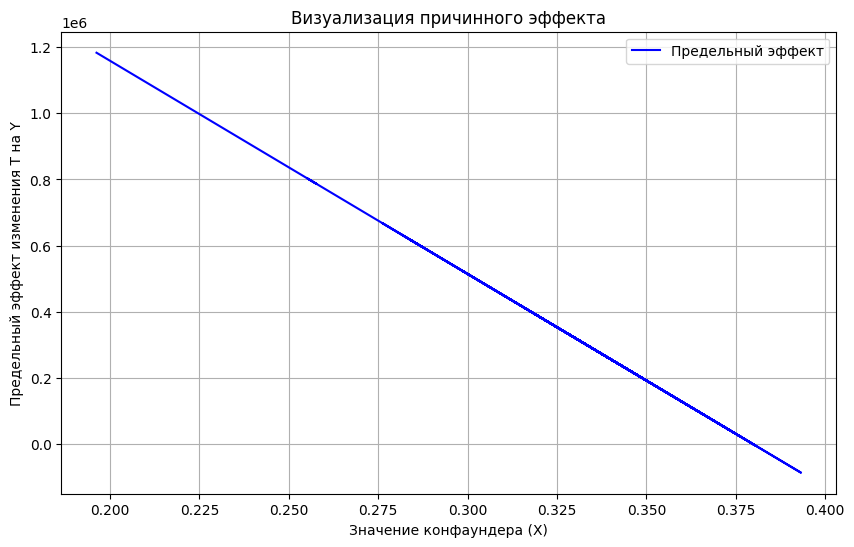

In [24]:
# X_test = df_test_sorted['aa_prompted_roll_kpi_percent_14_44_saa']
treatment_effects = dml_est.effect(T0=T0, T1=T1, X=X)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(X, treatment_effects, label="Предельный эффект", color="blue")
plt.xlabel("Значение конфаундера (X)")
plt.ylabel("Предельный эффект изменения T на Y")
plt.title("Визуализация причинного эффекта")
plt.legend()
plt.grid(True)

plt.show()

Интерпретация графика:

* Направление связи:  График покажет, как меняется предельный эффект (влияние изменения T на Y) в зависимости от значений конфаундера (X). Например,  эффект может быть положительным для одних значений X и отрицательным для других.
* Сила связи:  Крутизна линии на графике будет отражать силу связи - чем круче линия, тем сильнее влияние  изменения T на Y  при данном значении X.


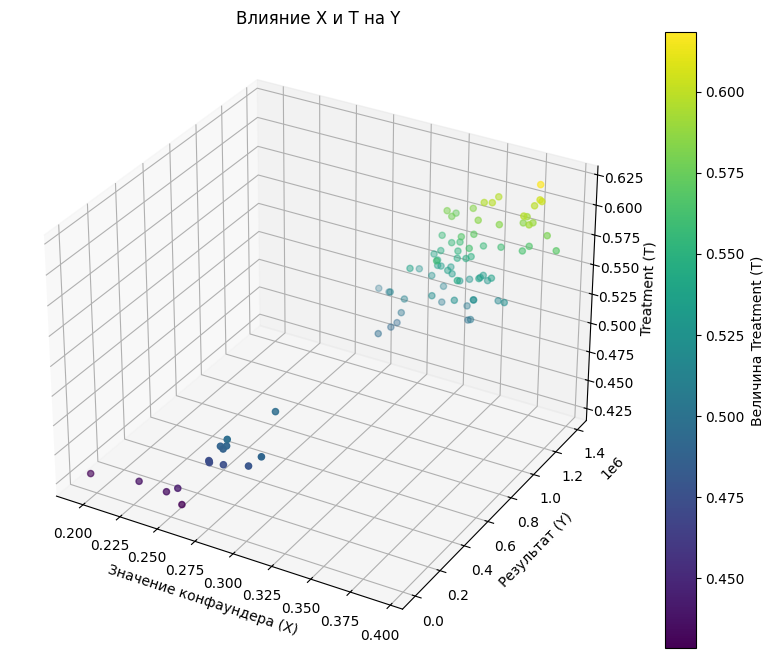

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot с цветовым кодированием
img = ax.scatter(X, Y, T, c=T, cmap='viridis')

ax.set_xlabel("Значение конфаундера (X)")
ax.set_ylabel("Результат (Y)")
ax.set_zlabel("Treatment (T)")
plt.colorbar(img, label="Величина Treatment (T)")
plt.title("Влияние X и T на Y")
plt.show()

# -----------

# Visualize Causal Pathway with DoWhy

In [42]:
Y = saa[['dau_saa']]
T = saa[['brand_preference_roll_kpi_percent_14_44_saa']]
X = saa[['aa_prompted_roll_kpi_percent_14_44_saa',
         'consid_roll_kpi_percent_14_44_saa',
         'ba_prompted_roll_kpi_percent_14_44_saa',
         'ba_top_of_mind_roll_kpi_percent_14_44_saa',
        'ba_spontaneous_roll_kpi_percent_14_44_saa']]

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# initiate an EconML cate estimator 
est = LinearDML(model_y=GradientBoostingRegressor(), 
                model_t=GradientBoostingRegressor(),
               featurizer=PolynomialFeatures(degree=1,include_bias=False))

feature_names=['aa_prompted',
         'consid',
         'ba_prompted',
         'ba_top_of_mind',
        'ba_spontaneous']

Разница в том, что мы предполагаем, что только характеристики X влияют на силу связи между Y и T]\\

In [46]:
4173486.334 + -6359686.691 + 73553631.486 + 134024933.476 + -10151047.065

In [49]:
te_pred_linear

array([ 158521.72350567,   18100.2024609 ,  -72855.42111777,
        -68420.46774624,  -69065.67568815,  -20492.29157838,
         73276.45025906,  117407.85600934,  150066.16860143,
        174469.41541792,  161164.07549259,  117147.33364826,
        194948.13785179,  270872.53576809,  251484.56115509,
        220791.40556748,  192382.15016194,  180028.1267893 ,
        264585.82253386,  262228.42098111,  225795.82634355,
        243991.18565897,  262264.03253818,  296735.04155631,
        188782.70508253,  131042.02026673,   87285.78753279,
         83661.43261173,  121650.11315648,  114514.00839385,
       -144263.92213727, -171577.02692285,   21685.22243445,
         33326.90509681,  176264.33205167,  136625.75550632,
        163360.90442615,  152192.43766217,  100312.80417567,
        118670.9385055 ,  143713.43231455,  212676.4444303 ,
        220254.5224773 ,  142237.56863486,  189701.90448455,
        294291.95661119,  192196.89160524,  112742.68001253,
       -125321.04822426,

In [45]:
# fit through dowhy
est_dw = est.dowhy.fit(Y=Y,T=T,X=X, outcome_names=['dau_saa'],treatment_names=['brand_preference'],
                       feature_names=feature_names, 
                       inference='statsmodels')

te_pred_linear = est_dw.effect(T0=T0, T1=T1, X=X).flatten()
# средний причинно-следственный эффект
print("Средний причинно-следственный эффект:", te_pred_linear.mean())
est_dw.summary()

Средний причинно-следственный эффект: 97948.20682726408


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
aa_prompted,4173486.334,69109675.902,0.06,0.952,-131278989.417,139625962.085
consid,-6359686.691,90700202.054,-0.07,0.944,-184128816.108,171409442.726
ba_prompted,73553631.486,52334179.43,1.405,0.16,-29019475.357,176126738.329
ba_top_of_mind,134024933.476,170926865.93,0.784,0.433,-200985567.736,469035434.689
ba_spontaneous,-211341851.401,127683151.407,-1.655,0.098,-461596229.592,38912526.79
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-10151047.065,12553903.258,-0.809,0.419,-34756245.317,14454151.187


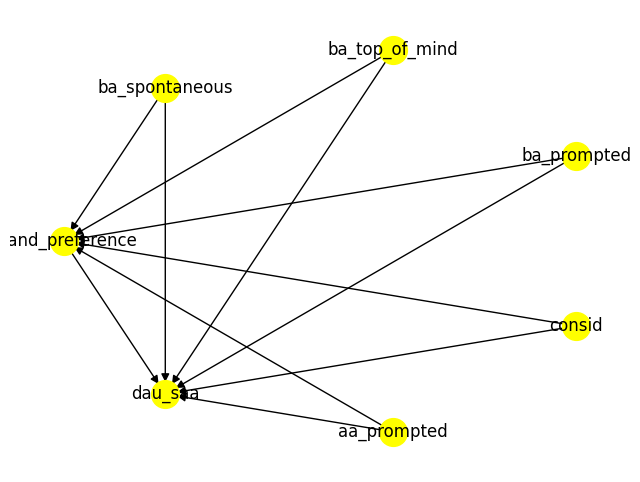

In [30]:
# Visualize causal graph
est_dw.view_model()

# Identify which estimation method are applicable 

In [31]:
identified_estimand = est_dw.identified_estimand_
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(E[dau_saa|ba_prompted,consid,ba_top_of_mind,ba_spontaneous
d[brand_preference]                                                           

              
,aa_prompted])
              
Estimand assumption 1, Unconfoundedness: If U→{brand_preference} and U→dau_saa then P(dau_saa|brand_preference,ba_prompted,consid,ba_top_of_mind,ba_spontaneous,aa_prompted,U) = P(dau_saa|brand_preference,ba_prompted,consid,ba_top_of_mind,ba_spontaneous,aa_prompted)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Causal Analysis

Добавим фиктивную переменную о перидах РК

In [32]:
saa.index = saa.date

In [33]:
saa['dummy_rk'] = 'None'
# saa['dummy_rk'].loc['2022-09-01':'2022-09-30'] = 'first'
# saa['dummy_rk'].loc['2023-03-01':'2023-04-09'] = 'second'
# saa['dummy_rk'].loc['2023-10-09':'2023-11-26'] = 'third '
# saa['dummy_rk'].loc['2023-12-16':'2023-12-31'] = 'fourth'
saa['dummy_rk'].loc['2024-02-26':'2024-03-31'] = 'flight'
# saa['dummy_rk'].loc['2024-06-01':'2024-06-30']

In [34]:
x_train.columns

NameError: name 'x_train' is not defined

In [35]:
from econml.solutions.causal_analysis import CausalAnalysis
# initialize heterogeneity features
kpi = 'dau_saa'
hetero_cols = ['dummy_rk']
feature_cols = ['aa_prompted_roll_kpi_percent_14_44_saa',
       'ba_prompted_roll_kpi_percent_14_44_saa',
       'ba_spontaneous_roll_kpi_percent_14_44_saa',
       'ba_top_of_mind_roll_kpi_percent_14_44_saa',
       'consid_roll_kpi_percent_14_44_saa',
       'brand_preference_roll_kpi_percent_14_44_saa'
               ]
categorical = ['dummy_rk']
y_train = saa[kpi]
x_train = saa[feature_cols + hetero_cols]


ca = CausalAnalysis(
    feature_inds=feature_cols, # факторы, для которых оцениваются причинные эффекты
    categorical = categorical,
    heterogeneity_inds=hetero_cols,
    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=1,
    upper_bound_on_cat_expansion=6, verbose=0
)
ca.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 6
[LightGBM] [Info] Start training from score 1315459.599576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!


## Глобальный причинный эффект (CATE, Conditional Average Treatment Effect)


CATE - это  среднее  влияние  переменной воздействия (T)  на  целевую  переменную (Y)  для  всех наблюдений  с  определенным  набором  признаков (X). 

In [70]:
# get global causal effect ordered by causal importance (pvalue)
global_summ = ca.global_causal_effect(alpha=0.05)
global_summ.sort_values(by="p_value")

,point,stderr,zstat,p_value,ci_lower,ci_upper
feature,,,,,,
aa_prompted_roll_kpi_percent_14_44_saa,18001917.218,7328635.630,2.456,0.014,3638055.327,32365779.109
brand_preference_roll_kpi_percent_14_44_saa,25908750.839,10760374.174,2.408,0.016,4818804.998,46998696.680
consid_roll_kpi_percent_14_44_saa,28454952.010,16266991.588,1.749,0.080,-3427765.640,60337669.659
ba_top_of_mind_roll_kpi_percent_14_44_saa,-27439160.202,25830168.704,-1.062,0.288,-78065360.576,23187040.172
ba_spontaneous_roll_kpi_percent_14_44_saa,10226933.216,18038237.539,0.567,0.571,-25127362.706,45581229.137
ba_prompted_roll_kpi_percent_14_44_saa,4756263.394,10664829.178,0.446,0.656,-16146417.696,25658944.484


В приведенной выше таблице признаки отсортированы по причинно-следственной значимости (p value).

### CATE validation

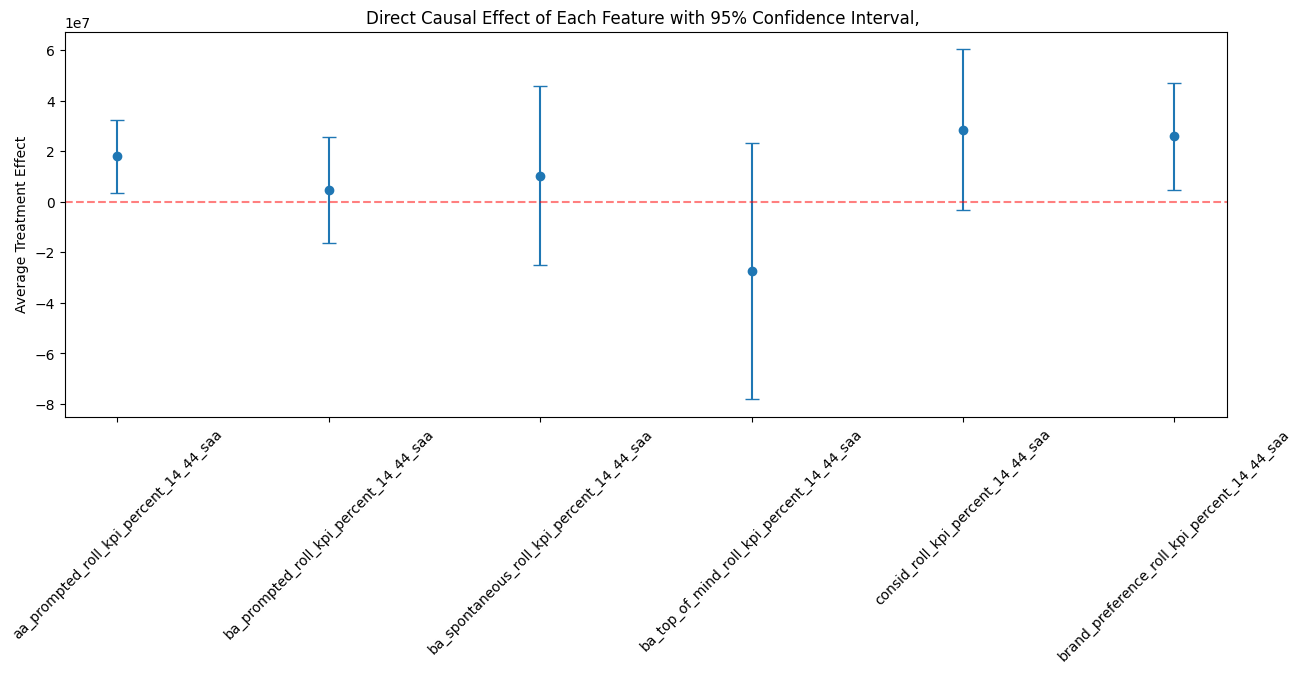

In [71]:
# helper function to plot error bar
def errorbar(res):
    xticks = res.index.get_level_values(0)
    lowererr = res["point"] - res["ci_lower"]
    uppererr = res["ci_upper"] - res["point"]
    xticks = [
        "{}***".format(t)
        if p < 1e-6
        else ("{}**".format(t) if p < 1e-3 else ("{}*".format(t) if p < 1e-2 else t))
        for t, p in zip(xticks, res["p_value"])
    ]
    plot_title = "Direct Causal Effect of Each Feature with 95% Confidence Interval, "
    plt.figure(figsize=(15, 5))
    plt.errorbar(
        np.arange(len(xticks)),
        res["point"],
        yerr=[lowererr, uppererr],
        fmt="o",
        capsize=5,
        capthick=1,
        barsabove=True,
    )
    plt.xticks(np.arange(len(xticks)), xticks, rotation=45)
    plt.title(plot_title)
    plt.axhline(0, color="r", linestyle="--", alpha=0.5)
    plt.ylabel("Average Treatment Effect")
errorbar(global_summ)

## Локальный причинный эффект (ITE, Individual Treatment Effect)

ITE  - это  влияние  переменной воздействия (T)  на  целевую  переменную (Y)  для  конкретного  наблюдения  (с  его  собственным   набором   признаков X). 

In [72]:
local_effect = ca.local_causal_effect(x_train)
local_effect

point       stderr  \
sample feature                                                                  
0      aa_prompted_roll_kpi_percent_14_44_saa       18585454.331  7762063.571   
       ba_prompted_roll_kpi_percent_14_44_saa        5082618.513 11298199.915   
       ba_spontaneous_roll_kpi_percent_14_44_saa    11182653.277 19084329.893   
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -29312332.920 27357157.591   
       consid_roll_kpi_percent_14_44_saa            30036326.893 17233603.517   
...                                                          ...          ...   
88     ba_prompted_roll_kpi_percent_14_44_saa        5082618.513 11298199.915   
       ba_spontaneous_roll_kpi_percent_14_44_saa    11182653.277 19084329.893   
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -29312332.920 27357157.591   
       consid_roll_kpi_percent_14_44_saa            30036326.893 17233603.517   
       brand_preference_roll_kpi_percent_14_44_saa  28209655.770 11379439.726   

                                                    zstat  p_value  \
sample feature                                                       
0      aa_prompted_roll_kpi_percent_14_44_saa       2.394    0.017   
       ba_prompted_roll_kpi_percent_14_44_saa       0.450    0.653   
       ba_spontaneous_roll_kpi_percent_14_44_saa    0.586    0.558   
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -1.071    0.284   
       consid_roll_kpi_percent_14_44_saa            1.743    0.081   
...                                                   ...      ...   
88     ba_prompted_roll_kpi_percent_14_44_saa       0.450    0.653   
       ba_spontaneous_roll_kpi_percent_14_44_saa    0.586    0.558   
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -1.071    0.284   
       consid_roll_kpi_percent_14_44_saa            1.743    0.081   
       brand_preference_roll_kpi_percent_14_44_saa  2.479    0.013   

                                                        ci_lower     ci_upper  
sample feature                                                                 
0      aa_prompted_roll_kpi_percent_14_44_saa        3372089.285 33798819.376  
       ba_prompted_roll_kpi_percent_14_44_saa      -17061446.411 27226683.437  
       ba_spontaneous_roll_kpi_percent_14_44_saa   -26221945.982 48587252.536  
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -82931376.518 24306710.678  
       consid_roll_kpi_percent_14_44_saa            -3740915.324 63813569.110  
...                                                          ...          ...  
88     ba_prompted_roll_kpi_percent_14_44_saa      -17061446.411 27226683.437  
       ba_spontaneous_roll_kpi_percent_14_44_saa   -26221945.982 48587252.536  
       ba_top_of_mind_roll_kpi_percent_14_44_saa   -82931376.518 24306710.678  
       consid_roll_kpi_percent_14_44_saa            -3740915.324 63813569.110  
       brand_preference_roll_kpi_percent_14_44_saa   5906363.741 50512947.798  

[534 rows x 6 columns]

In [73]:
ca.individualized_policy(
    x_train,
    "aa_prompted_roll_kpi_percent_14_44_saa",
    n_rows=5,
    treatment_costs=2500,
    alpha=0.1,
)

,Treatment,Effect of treatment,Effect of treatment lower bound,Effect of treatment upper bound,Current treatment,ba_prompted_roll_kpi_percent_14_44_saa,ba_spontaneous_roll_kpi_percent_14_44_saa,ba_top_of_mind_roll_kpi_percent_14_44_saa,consid_roll_kpi_percent_14_44_saa,brand_preference_roll_kpi_percent_14_44_saa,dummy_rk
date,,,,,,,,,,,
2022-09-19,increase,606675.061,188196.334,1025153.788,0.196,0.430,0.133,0.072,0.239,0.076,None
2023-09-25,increase,606675.061,188196.334,1025153.788,0.344,0.528,0.195,0.100,0.310,0.104,None
2023-11-20,increase,606675.061,188196.334,1025153.788,0.376,0.566,0.209,0.101,0.352,0.123,None
2023-11-13,increase,606675.061,188196.334,1025153.788,0.393,0.569,0.211,0.105,0.380,0.146,None
2023-11-06,increase,606675.061,188196.334,1025153.788,0.387,0.580,0.205,0.104,0.363,0.139,None


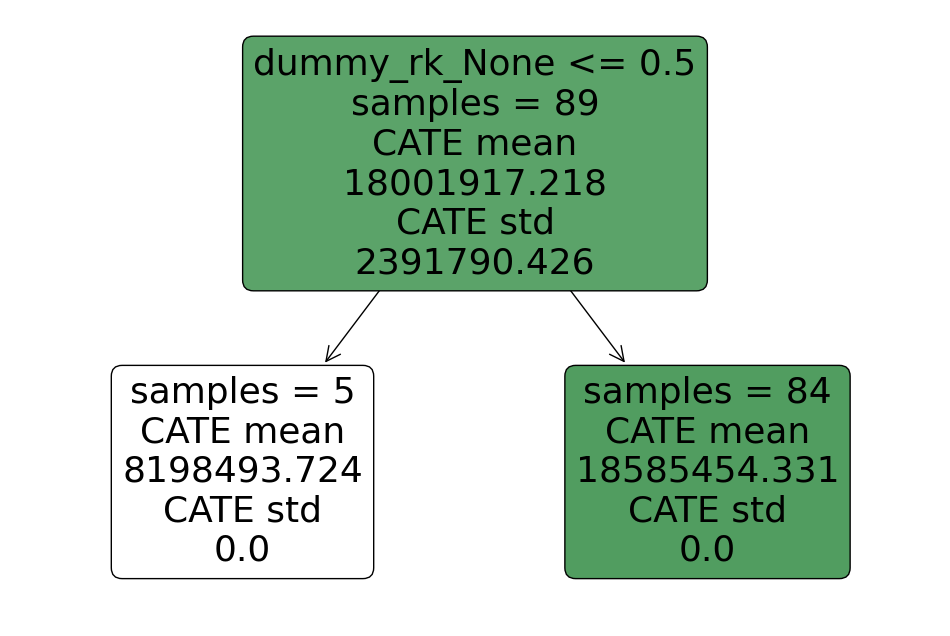

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [74]:
plt.figure(figsize=(12, 8))
ca.plot_heterogeneity_tree(
    x_train,
    "aa_prompted_roll_kpi_percent_14_44_saa",
    max_depth=6,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

# X-learner